# Lecture 19: Web part 2 
Generating HTML and Scraping Web Data

In [23]:
# import statments
import pandas as pd
import requests
import csv
import os

from bs4 import BeautifulSoup # bs4 is the module, BeautifulSoup is the type

In [3]:
# inspired by https://automatetheboringstuff.com/2e/chapter16/
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    
    return example_data

###  P10 check-in

In [4]:
# It is very important to check auto-grader test results on p10 in a timely manner.
# Take a few minutes to verify if you hardcoded the slashes in P10 rather than using os.path.join? 
       # Your code won't clear auto-grader if you hardcode either "/" or "\" 
       # for *ANY* relative path in the entire project
# Check your code and check the autograder as soon as possible.


## Generating HTML

### Learning Objectives:

Generating HTML
- Type by hand a basic HTML page with a list, a link, and a table
- Convert a Python list into an HTML unordered list
- Convert a Python dictionary of URLs into an HTML of hyperlinks
- Convert a Pandas DataFrame into an HTML table

Web scraping
- Using the Document Object Model of web pages
    - describe the 3 things a DOM element may contain, and give examples of each
    - given an html string, identify the correct DOM tree of elements
- Create BeautifulSoup objects from an html string and use prettify to display
- Use the BeautifulSoup methods 'find' and 'find_all' to find particular elements by their tag
- Inspect a BeautufulSoup element to determine the contents of a web page using get_text(), children, and attrs
- Use BeautifulSoup to scrape a live web site. 

### Part A: Type by hand a basic HTML page with a list, a link, and a table

Markdown and Jupyter Notebook will recognize HTML tags.

`esc` -> `m`

Otherwise, "Cell" -> "Cell Type" -> "Markdown"

### Practice the following tags in the cell below: 
 - h#
 - p
 - i
 - b
 - br
 - img

<i>Make a new Jupyter Notebook text file in this directory.</i> Save the file with a <b><i>.html</i></b> extension
<p> The head, body, and html tags are not necessary 
for a browser to read a file.</p>

<h2> Happy Monday!! </h2>

<p>It's going to be a <b>fun</b> day <br><br><br></p>

<p>Note that br does not have a close tag<p>
    
<img src="https://www.python.org/static/img/python-logo@2x.png">

### Hyperlink tags have an anchor tag and a href attribute
`a`: anchor

`href=` : hyper references 

Meena's favorite restaurant in Madison is
<a href="https://www.royalindiancuisinemadison.com/">Royal Indian Cuisine</a>

### Unordered List Tags
`ul` : starts an unordered list

`li` : add a list item

Un-ordered list example:

<h6>Favorite Campus Buildings</h6>
<ul>
    <li>Union South</li>
    <li>WIDS</li>
    <li>Education</li>
    <li>The Nick</li>
</ul>

### Ordered List Tags
`ol` : starts an ordered list

`li` : add a list item (End of `li` tag is optional)

Un-ordered list example:

<h6>Exam venues for spring 2023</h6>
<ol>
    <li>LEC001: Bascom 272
    <li>LEC002: Humanities 3650
    <li>LEC003: Ingraham B10
    <li>LEC004: Humanities 2650
</ol>

### HTML Table Tags

`table`: start and end of a table

`tr`: start and end of a new row

`th`: a cell in the top row ... is bold

`td`: a cell inside a row

Add a few rows to the table below:

<table>
  <tr>
    <th>State</th>
    <th>Capital City</th>
  </tr>
  <tr>
    <td>Wisconsin</td>
    <td>Madison</td>
  </tr>
  <tr>
    <td>Indiana</td>
    <td>Indianapolis</td>
  </tr>
   <tr>
    <td>Illinois</td>
    <td>Springfield</td>
  </tr>
</table>

### Part B: Convert a Python list into an HTML unordered list

Given:  

`health_tips = ["Eat Healthy", "Exercise", "Relax", "Sleep"]`
    
Convert this Python list into a HTML ordered list:

<ul>
    <li>Eat Healthy</li>      
       <li>Exercise</li>
  <li>Relax</li>
       <li>Sleep</li>
</ul> 

Pseudocode:
- Open path (relative path to target file) in write mode. Type in the close function call right away.
- Write \<ul> tag into the html file
- Iterate over each item in my_list.
- Write each item with <\li> tag.
- After you are done iterating, write \</ul> tag.
- Close the file object.

In [5]:
def list_to_html(my_list, path):
    # open the file in write mode
    f = open(path, "w")

    # open the ul block
    f.write("<ul>\n")

    for item in my_list:
        f.write("<li>" + item + "</li>\n")

    # close the ul block
    f.write("</ul>\n")

    # Close the file
    f.close()
    
todo_list = ["Eat Healthy", "Exercise", "Relax", "Sleep"]
list_to_html(todo_list, "todolist.html")

# Check that you made your document!

### Part C. Convert a Dictionary of Web Site Name, URL into a HTML page of hyperlinks

In [7]:
fav_sites = {
    "National Weather Service": "http://weather.gov",
    "Greenbush Bakery": "https://www.greenbushbakery.com/",
}

In [9]:
# Turn fav_sites into a string of many links!
html_string = ''
for key in fav_sites:
    html_string += '<a href="' + fav_sites[key] + '">' + key + '</a><br>\n'
print(html_string)

<a href="http://weather.gov">National Weather Service</a><br>
<a href="https://www.greenbushbakery.com/">Greenbush Bakery</a><br>



Insert a markdown cell below and paste your code in the markdown cell below to test it!

In [10]:
# Now that we know it works, open a file for writing and write the string to a file
f = open('mylinks.html', 'w')
f.write(html_string)
f.close()

### Create your own html document using any of the below!

In [11]:
my_favorite_sports = ["running", "eating", "biking"]
my_favorite_color = "blanchedalmond"
good_numbers = [3, 7, 27, 98]

some_scores = {
    "Bob": 23,
    "Alice": 47,
    "Theresa": 12,
    "Daniel": 4,
    "Lincoln": 11,
    "Liz": 19
}

adoptable_cats = [
    "https://g.petango.com/photos/2627/be7116de-c11f-4622-acf1-7e6b34ceef62.jpg",
    "https://g.petango.com/photos/2627/896b1ca7-5454-4977-93b3-94542ca67924.jpg",
    "https://g.petango.com/photos/444/2a920055-5928-4fef-b9c5-264500508a04.jpg",
    "https://g.petango.com/photos/444/503d042d-ef52-4b9c-a970-17524184f935.jpg"
]

adoptable_cats_with_names = [
    {"name": "victor", "imglink": 
     "https://g.petango.com/photos/2627/be7116de-c11f-4622-acf1-7e6b34ceef62.jpg"},
    {"name": "gideon", "imglink": 
     "https://g.petango.com/photos/2627/896b1ca7-5454-4977-93b3-94542ca67924.jpg"},
    {"name": "ezra", "imglink": 
     "https://g.petango.com/photos/444/2a920055-5928-4fef-b9c5-264500508a04.jpg"},
    {"name": "julia", "imglink": 
     "https://g.petango.com/photos/444/503d042d-ef52-4b9c-a970-17524184f935.jpg"}
]

In [12]:
# Create it here!
f = open("cats.html", "w")
f.write("<h1>Adoptable cats!</h1>")
for cat in adoptable_cats_with_names:
    f.write('<h2>{}</h2>\n'.format(cat["name"]))
    f.write('<img src="{}">\n'.format(cat['imglink']))
f.close()

### Part D:  Convert a Pandas Data Frame into a HTML table
Is there an easy way to make a HTML table?

Yes, Pandas has a DataFrame method `.to_html()`


In [13]:
# Load from the IMDB-Movie-Data.csv file into a DataFrame called "movies"
movies = pd.read_csv("IMDB-Movie-Data.csv")
movies

Title                         Genre  \
0            Guardians of the Galaxy       Action,Adventure,Sci-Fi   
1                         Prometheus      Adventure,Mystery,Sci-Fi   
2                              Split               Horror,Thriller   
3                               Sing       Animation,Comedy,Family   
4                      Suicide Squad      Action,Adventure,Fantasy   
...                              ...                           ...   
1063  Guardians of the Galaxy Vol. 2     Action, Adventure, Comedy   
1064                     Baby Driver          Action, Crime, Drama   
1065                  Only the Brave      Action, Biography, Drama   
1066                   Incredibles 2  Animation, Action, Adventure   
1067                  A Star Is Born         Drama, Music, Romance   

                  Director                                               Cast  \
0               James Gunn  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
1             Ridley Scott  Noomi Rapace, Logan Marshall-Green, Michael   ...   
2       M. Night Shyamalan  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
3     Christophe Lourdelet  Matthew McConaughey,Reese Witherspoon, Seth Ma...   
4               David Ayer  Will Smith, Jared Leto, Margot Robbie, Viola D...   
...                    ...                                                ...   
1063            James Gunn  Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...   
1064          Edgar Wright  Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...   
1065       Joseph Kosinski  Josh Brolin, Miles Teller, Jeff Bridges, Jenni...   
1066             Brad Bird  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...   
1067        Bradley Cooper  Lady Gaga, Bradley Cooper, Sam Elliott, Greg G...   

      Year  Runtime  Rating  Revenue  
0     2014      121     8.1   333.13  
1     2012      124     7.0  126.46M  
2     2016      117     7.3  138.12M  
3     2016      108     7.2   270.32  
4     2016      123     6.2   325.02  
...    ...      ...     ...      ...  
1063  2017      136     7.6   389.81  
1064  2017      113     7.6   107.83  
1065  2017      134     7.6    18.34  
1066  2018      118     7.6   608.58  
1067  2018      136     7.6   215.29  

[1068 rows x 8 columns]

In [15]:
# Convert the movies DataFrame to html using .to_html()
movies_html = movies.to_html()
#movies_html # uncomment to see the HTML string

In [16]:
# Write it to a file
f = open("movies_table.html", "w")
f.write(movies_html)
f.close()

### Demo: CSV File to Webpages

In [17]:
# Read in the reviews.csv file
amazon_csv = process_csv("reviews.csv")
header = amazon_csv[0]
reviews = amazon_csv[1:]
reviews[1]

['99904',
 'amazon power fast usb charger',
 'got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire',
 '5',
 'True',
 '2',
 '2016-06-03']

In [18]:
# Create the folder "data" if it does not already exist.
if not os.path.exists("data"):
    os.mkdir("data")

#### Example Review Page

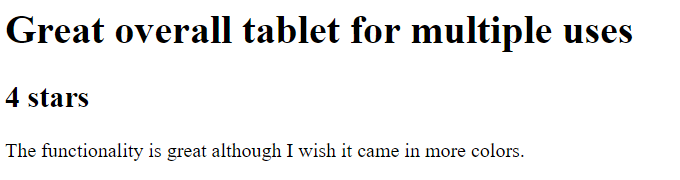

Pseudocode:
- Extract title, text, and rating column values.
- Initialize `html_review` to an empty string.
- Concatenate to `html_review` \<h1> with title
- Concatenate to `html_review` \<h2> tag with rating
- Concatenate to `html_review` \<p> tag with text
- Return `html_review`

In [19]:
def gen_amazon_review_html(data, header):
    """
    Generate a string html for a single review page
    """
    title = data[header.index("review title")]
    text = data[header.index("review text")]
    rating = data[header.index("review rating")]
    
    html_review = ""
    html_review += "<h1>{}</h1>\n".format(title)
    html_review += "<h2>{} stars</h2>\n".format(rating)
    html_review += "<p>{}</p>\n".format(text)
    return html_review

#### Use get_amazon_review_html to write to "my_review.html" for any random review

In [20]:
html_file = open("my_review.html", "w")
# essential hardcoding for this example
amazon_review_html = gen_amazon_review_html(reviews[2], header)
html_file.write(amazon_review_html)
html_file.close()

#### For each Amazon review, write to a file data/\<id>.html ; e.g. data/3966.html.

- Open data/\<rid>.html in write mode:
    - **IMPORTANT**:Remember, you have to use os.path.join().
- Invoke `gen_amazon_review_html` and write return value into html file
- Close data/\<rid>.html file object

In [21]:
for review in reviews:
    review_id = review[header.index("review id")] 
    html_file = open(os.path.join("data", review_id + ".html"), "w")
    review_html = gen_amazon_review_html(review, header)
    html_file.write(review_html)
    html_file.close()

#### Example Parent Page


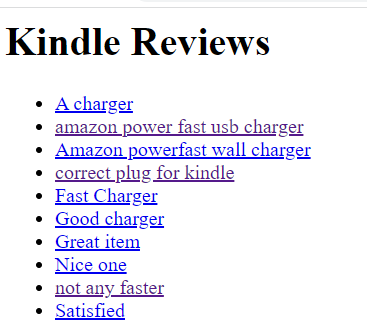

Hint: We can create a link to a child page by formatting the code...

`<li><a href = "{}">{}</a></li>\n`

Pseudocode:
- Initialize `parent_html` to empty string
- Concatenate to `parent_html`: \<h1> tag with content as Kindle Reviews
- Concatenate to `parent_html` \<ul> tag into all_reviews.html file
- Iterate over reviews
    - Concatenate to `parent_html` \<li> tag
    - Concatenate to `parent_html` each data/\<rid>.html as hyperlink using \<a> tag.
        - **IMPORTANT**:Remember, you have to use os.path.join().
- Concatenate to `parent_html` close \</ul> tag into all_reviews.html file

- Open all_reviews.html file in write mode
- Write `parent_html` into all_reviews.html file
- Close all_reviews.html file

In [22]:
# Create a parent page that is an unordered list with links to each review.
parent_html = ""
parent_html += "<h1>Amazon Reviews</h1>\n"
parent_html += "<ul>\n"

for review in reviews:
    review_id = review[header.index("review id")] 
    review_title = review[header.index("review title")]
    
    path_to_review = os.path.join("data", review_id + ".html")
    review_link = '<li><a href="{}">{}</a></li>\n'.\
            format(path_to_review, review_title)
    parent_html += review_link
parent_html += "</ul>\n"

all_reviews_file = open("all_reviews.html", "w")
all_reviews_file.write(parent_html)
all_reviews_file.close()

## Scraping Web Data 

Part 2 of lecture.

### Warmup 0: Import
G to the import cell at the top of this notebook and add the line `from bs4 import BeautifulSoup`.
Note that `bs4` is the module and `BeautifulSoup` is the type

### Warmup 1: HTML table and hyperlinks
In order to scrape web pages, you need to know the HTML syntax for tables and hyperlinks.

TODO: Add another row or two to the table below

<table>
  <tr>
    <th>University</th>
    <th>Department</th>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://www.cs.wisc.edu/">Computer Sciences</a></td>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://stat.wisc.edu/">Statistics</a></td>
  </tr>
   <tr>
    <td>UW-Madison</td>
    <td><a href = "https://cdis.wisc.edu/">CDIS</a></td>
  </tr>
  <tr>
    <td>UC Berkeley</td>
    <td><a href = "https://eecs.berkeley.edu/">Electrical Engineering and Computer Sciences</a></td>
    </tr>
</table>

### Warmup 2: Scraping data from syllabus page
URL: https://cs220.cs.wisc.edu/f22/syllabus.html

In [24]:
# Get this page using requests.  
url = "https://cs220.cs.wisc.edu/f22/syllabus.html"
r = requests.get(url)

# make sure there is no error
r.raise_for_status()

# read the entire contents of the page into a single string variable
contents = r.text

# split the contents into list of strings using newline separator
content_list = contents.split("\n")

#### Warmup 2a: Find all sentences that contain "Meena"

In [25]:
meena_sentences = [sentence for sentence in content_list if "Meena" in sentence]

#### Warmup 2b: Extract title tag's value

In [26]:
title_tag = meena_sentences[0]
print(title_tag)
title_tag = title_tag.strip()
print(title_tag)
title_tag_parts = title_tag.split(">")
print(title_tag_parts)
title_details = title_tag_parts[1]
title_detail_parts = title_details.split("<")
title_detail_parts[0] # finally, we are able to extract the title tag's data
# Takeaway:  It would be nice if there were a module that could make finding easy!

    <title>Meenakshi Syamkumar</title>
<title>Meenakshi Syamkumar</title>
['<title', 'Meenakshi Syamkumar</title', '']


'Meenakshi Syamkumar'

### Document Object Model

In order to render a HTML page, most web browsers use a tree structure called Document Object Model (DOM) to represent the HTML page as a hierarchy of elements.

<div>
<img src="attachment:image.png" width="600"/>
</div>

### Take a look at the HTML in the below cell.

<b>To Do List</b>
<ul>
    <li>Eat Healthy</li>
    <li>Sleep <b>More</b></li>
    <li>Exercise</li>
</ul>

### BeautifulSoup constructor
- takes a html, as a string, as argument  and parses it
- Syntax: `BeautifulSoup(<html_string>, "html.parser")`
- Second argument specifies what kind of parsing we want done

New syntax, you can use `"""some really long string"""` to split a string across multiple lines.

In [27]:
html_string = """
<b>To Do List</b>
<ul>
    <li>Eat Healthy</li>
    <li>Sleep <b>More</b></li>
    <li>Exercise</li>
</ul>
"""

bs_obj = BeautifulSoup(html_string, "html.parser")

type(bs_obj)

bs4.BeautifulSoup

## BeautifulSoup operations
- `prettify()`        returns a formatted representation of the raw HTML

### A  BeautifulSoup object can be searched for elements using:
- `find("")`         returns the first element matching the tag string, None otherwise
- `find_all("")`     returns an iterable of all matching elements (HTML 'tags'), empty iterable otherwise

### Beautiful Soup Elements can be inspected by using:
- `get_text()`     returns the text associated with this element, if applicable; does not return the child elements associated with that element
- `.children`      all children of this element (can be converted into a list)
- `.attrs`          the atribute associated with that element / tag.

`prettify()` returns a formatted representation of the raw HTML

In [28]:
print(bs_obj.prettify())

<b>
 To Do List
</b>
<ul>
 <li>
  Eat Healthy
 </li>
 <li>
  Sleep
  <b>
   More
  </b>
 </li>
 <li>
  Exercise
 </li>
</ul>



`find` returns the first HTML 'tag' matching the string "b"

In [29]:
element = bs_obj.find("b")

What is the type of find's return value?

In [30]:
print(type(element))

<class 'bs4.element.Tag'>


How do we extract the text of the "b" element and what is its type?

In [31]:
text = element.get_text()
print(text, type(text))

To Do List <class 'str'>


`find` returns None if it cannot find that element.

In [33]:
# assert that this html string has a <ul> tag
assert bs_obj.find('ul') != None

# assert that this does not have an <a> tag
assert bs_obj.find("a") == None

`find_all` returns an iterable of all matching elements (HTML 'tags') matching the string "b"

In [34]:
element_list = bs_obj.find_all("b")
element_list

[<b>To Do List</b>, <b>More</b>]

What is the type of return value of `find_all`?

In [35]:
type(element_list)

bs4.element.ResultSet

In [36]:
type(element_list[0])

bs4.element.Tag

Use a for loop to print the text of each "b" element.

In [37]:
for element in element_list:
    print(element.get_text())

To Do List
More


Unlike `find`, `find_all` returns an empty iterable, when there are no matching elements.

In [38]:
# only searches for elements, not text
print(bs_obj.find_all("Sleep"))  
# if not present returns None
print(bs_obj.find("Sleep"))      

[]
None


You can invoke `find` or `find_all` on other BeautifulSoup object instances.

Find all `li` elements and find `b` element inside the second `li` element.

In [39]:
li_elements = bs_obj.find_all("li")
second_li = li_elements[1]
second_li.find("b")

<b>More</b>

DOM trees are hierarchical. You can use `.children` on any element to gets its children.

Find all the children of "ul" element.

In [40]:
element = bs_obj.find("ul")
children_list = list(element.children)
children_list

['\n',
 <li>Eat Healthy</li>,
 '\n',
 <li>Sleep <b>More</b></li>,
 '\n',
 <li>Exercise</li>,
 '\n']

Find text of every child element.

In [41]:
for child in children_list:
    print(child.get_text())



Eat Healthy


Sleep More


Exercise




Notice that `get_text()` only returns the actual text and not the HTML formatting. For example, part of second child element's text is enclosed within `<b>More</b>`. Despite that `get_text()`

To understand `attribute`, let's go back to the table from warmup 1.

In [42]:
html_string = """
<table>
  <tr>
    <th>University</th>
    <th>Department</th>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://www.cs.wisc.edu/">Computer Sciences</a></td>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://stat.wisc.edu/">Statistics</a></td>
  </tr>
   <tr>
    <td>UW-Madison</td>
    <td><a href = "https://cdis.wisc.edu/">CDIS</a></td>
  </tr>
  <tr>
    <td>UC Berkeley</td>
    <td>
    <a href = "https://eecs.berkeley.edu/">Electrical Engineering and Computer Sciences
    </a>
    </td>
    </tr>
</table>
"""

Find the table headers.

Find the first anchor element, extract its text.

In [43]:
bs_obj = BeautifulSoup(html_string, "html.parser")
th_elements = bs_obj.find_all("th") # works only if there is one

for th in th_elements:
    print(th.get_text())

University
Department


In [44]:
anchor = bs_obj.find("a")
print(anchor.get_text())

Computer Sciences


You can get the attributes associated with an element using `.attrs` on that element object. Return value will be a `dict` mapping each attribute to its value.

Now, let's get the attributes of the anchor element.

In [45]:
anchor_attributes = anchor.attrs
print(anchor_attributes)

{'href': 'https://www.cs.wisc.edu/'}


What is the return value type of `.attrs`?

In [46]:
type(anchor_attributes)

dict

Extract the hyperlink.

In [47]:
anchor_attributes['href']

'https://www.cs.wisc.edu/'

Extract hyperlinks for each department and populate department name and link into a `dict`.

In [48]:
department_urls = {} # Key: department name; Value: website URL
tr_elements = bs_obj.find_all('tr')

for tr in tr_elements:
    if tr.find("td")!= None:
        anchor = tr.find("a")
        name = anchor.get_text()
        website = anchor.attrs['href']
        department_urls[name] = website
department_urls

{'Computer Sciences': 'https://www.cs.wisc.edu/',
 'Statistics': 'https://stat.wisc.edu/',
 'CDIS': 'https://cdis.wisc.edu/',
 'Electrical Engineering and Computer Sciences\n    ': 'https://eecs.berkeley.edu/'}

#### Self-practice: Extract title of the CS220 syllabus page (from warmup 2)

In [50]:
# Get this page using requests.  
url = "https://cs220.cs.wisc.edu/f22/syllabus.html"
r = requests.get(url)

# make sure there is no error
r.raise_for_status()

# read the entire contents of the page into a single string variable
contents = r.text

# use BeautifulSoup to extract title
bs_obj = BeautifulSoup(contents, "html.parser")
bs_obj.find('title').get_text()

'Meenakshi Syamkumar'

## Parsing small_movies html table to extract `small_movies.json`

### Step 1: Read `small_movies.html` content into a variable

In [51]:
f = open("small_movies.html")
small_movies_str = f.read()
f.close()

### Step 2: Initialize BeautifulSoup object instance

In [52]:
bs_obj = BeautifulSoup(small_movies_str, "html.parser")

### Step 3: Find table element

In [53]:
table = bs_obj.find("table") # works only if we have exactly one table

### Step 4: Find all th tags, to parse the table header

In [54]:
header = [th.get_text() for th in table.find_all('th')]
header

['Title', 'Genre', 'Director', 'Cast', 'Year', 'Runtime', 'Rating', 'Revenue']

### Step 5: Scrape second row, convert data to appropriate types, and populate data into a row dictionary
- "Year", "Runtime": `int` conversion
- "Revenue": format_revenue(...) conversion
- "Rating": `float` conversion

In [55]:
def format_revenue(revenue):
    if type(revenue) == float: # need this in here if we run code multiple times
        return revenue
    elif revenue[-1] == 'M': # some have an "M" at the end
        return float(revenue[:-1]) * 1e6
    else:                    # otherwise, assume millions.
        return float(revenue) * 1e6

In [56]:
# Why second row? Because first row has the header information.

movie = {}

tr_elements = table.find_all('tr')
tr = tr_elements[1]
td_elements = tr.find_all('td')
for idx in range(len(td_elements)):
    td = td_elements[idx]
    val = td.get_text()
    if header[idx] in ["Year", "Runtime"]:
        movie[header[idx]] = int(val)
    elif header[idx] == "Revenue":
        revenue = format_revenue(val)
        movie[header[idx]] = revenue
    elif header[idx] == "Rating":
        movie[header[idx]] = float(val)
    else:
        movie[header[idx]] = val
    
movie

{'Title': 'Guardians of the Galaxy',
 'Genre': 'Action,Adventure,Sci-Fi',
 'Director': 'James Gunn',
 'Cast': 'Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana',
 'Year': 2014,
 'Runtime': 121,
 'Rating': 8.1,
 'Revenue': 333130000.0}

### Step 6: Scrape all rows, convert data to appropriate types, and populate data into a row dictionary and append row dictionaries into a list
- "Year", "Runtime": `int` conversion
- "Revenue": format_revenue(...) conversion
- "Rating": `float` conversion

You can compare your parsing output to `small_movies.json` file contents, to confirm your result.

In [57]:
movies_data = []

tr_elements = table.find_all('tr')
for tr in tr_elements[1:]: # Skip first row (header row)
    movie = {}
    td_elements = tr.find_all('td')
    for idx in range(len(td_elements)):
        td = td_elements[idx]
        val = td.get_text()
        if header[idx] in ["Year", "Runtime"]:
            movie[header[idx]] = int(val)
        elif header[idx] == "Revenue":
            revenue = format_revenue(val)
            movie[header[idx]] = revenue
        elif header[idx] == "Rating":
            movie[header[idx]] = float(val)
        else:
            movie[header[idx]] = val
    movies_data.append(movie)
movies_data

[{'Title': 'Guardians of the Galaxy',
  'Genre': 'Action,Adventure,Sci-Fi',
  'Director': 'James Gunn',
  'Cast': 'Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana',
  'Year': 2014,
  'Runtime': 121,
  'Rating': 8.1,
  'Revenue': 333130000.0},
 {'Title': 'Prometheus',
  'Genre': 'Adventure,Mystery,Sci-Fi',
  'Director': 'Ridley Scott',
  'Cast': 'Noomi Rapace, Logan Marshall-Green, Michael         fassbender, Charlize Theron',
  'Year': 2012,
  'Runtime': 124,
  'Rating': 7.0,
  'Revenue': 126460000.0},
 {'Title': 'Split',
  'Genre': 'Horror,Thriller',
  'Director': 'M. Night Shyamalan',
  'Cast': 'James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula',
  'Year': 2016,
  'Runtime': 117,
  'Rating': 7.3,
  'Revenue': 138120000.0},
 {'Title': 'Sing',
  'Genre': 'Animation,Comedy,Family',
  'Director': 'Christophe Lourdelet',
  'Cast': 'Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson',
  'Year': 2016,
  'Runtime': 108,
  'Rating': 7.2,
  'Revenue'

### Final step: convert steps 1 through 6 into a function and use that function to parse `full_movies.html` file.

In [58]:
def parse_html(html_file):
    f = open(html_file)
    small_movies_str = f.read()
    f.close()

    bs_obj = BeautifulSoup(small_movies_str, "html.parser")
    
    table = bs_obj.find("table") # works only when you have exactly 1 table
    header = [th.get_text() for th in table.find_all('th')]

    movies_data = []

    tr_elements = table.find_all('tr')
    for tr in tr_elements[1:]: # Skip first row (header row)
        movie = {}
        td_elements = tr.find_all('td')
        for idx in range(len(td_elements)):
            td = td_elements[idx]
            val = td.get_text()
            if header[idx] in ["Year", "Runtime"]:
                movie[header[idx]] = int(val)
            elif header[idx] == "Revenue":
                revenue = format_revenue(val)
                movie[header[idx]] = revenue
            elif header[idx] == "Rating":
                movie[header[idx]] = float(val)
            else:
                movie[header[idx]] = val
        movies_data.append(movie)
    
    return movies_data

In [59]:
full_movies_data = parse_html("full_movies.html")
# full_movies_data